In [11]:
import pandas as pd

file_path = "/content/Online_Retail.csv"
sales_data = pd.read_csv(file_path, encoding="windows-1252")

In [3]:
data = {
    'Timestamp': ['2024-07-22 10:00:00', '2024-07-22 11:00:00', '2024-07-22 12:00:00'],
    'Value': [100, 150, 200]
}
df = pd.DataFrame(data)

print(df)

             Timestamp  Value
0  2024-07-22 10:00:00    100
1  2024-07-22 11:00:00    150
2  2024-07-22 12:00:00    200


In [4]:
#Convertir la columna a tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Establecer Timestamp como índice
df.set_index('Timestamp', inplace= True)
print(df)

                     Value
Timestamp                 
2024-07-22 10:00:00    100
2024-07-22 11:00:00    150
2024-07-22 12:00:00    200


In [12]:
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])

#Establecer InvoiceDate como índice
sales_data.set_index('InvoiceDate', inplace=True)
print(sales_data.head())

<ipython-input-12-ca7d222fc092>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])


                    InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

                     Quantity  UnitPrice  CustomerID         Country  
InvoiceDate                                                           
2010-12-01 08:26:00         6       2.55     17850.0  United Kingdom  
2010-12-01 08:26:00         6       3.39     17850.0  United Kingdom  
2010-12-01 08:26:00         8       2.75     17850.0  United Kingdom  
2010-12-01 08:26:00         6       3.39     17850.0  United Kingdom  
2010-12-01 08

In [13]:
monthly_sales = sales_data['Quantity'].resample('M').sum()
print(monthly_sales)

InvoiceDate
2010-12-31    342228
2011-01-31    308966
2011-02-28    277989
2011-03-31    351872
2011-04-30    289098
2011-05-31    380391
2011-06-30    341623
2011-07-31    391116
2011-08-31    406199
2011-09-30    549817
2011-10-31    570532
2011-11-30    740286
2011-12-31    226333
Freq: M, Name: Quantity, dtype: int64


In [14]:
max_sales_month = monthly_sales.idxmax()
max_sales_value = monthly_sales.max()

print(f"El mes con mayores ventas es {max_sales_month.strftime('%B %Y')} con un total de {max_sales_value} unidades vendidas.")

El mes con mayores ventas es November 2011 con un total de 740286 unidades vendidas.


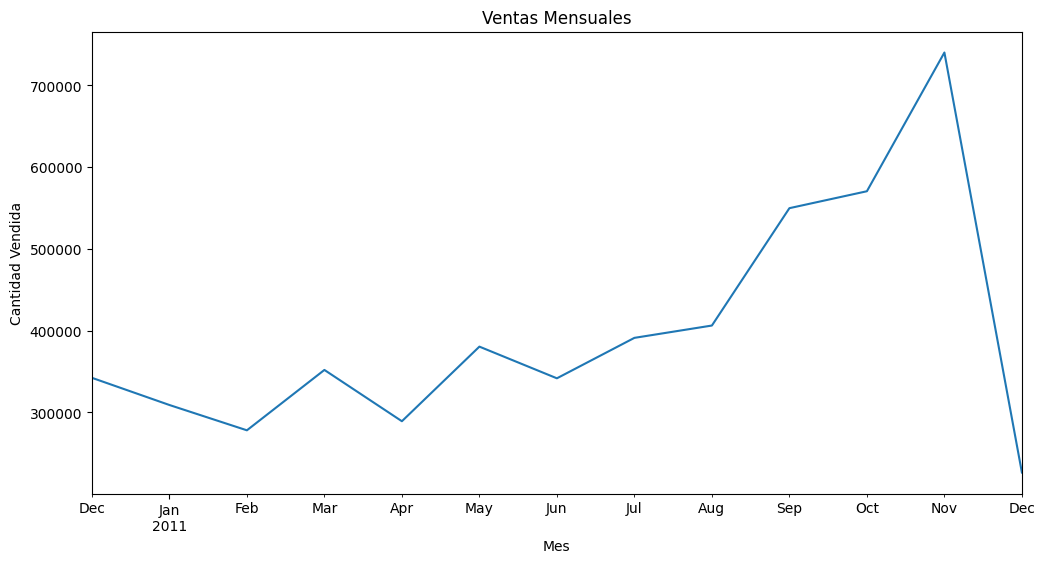

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.show()